In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from tqdm import tqdm
import matplotlib.patches as patches
import matplotlib

In [2]:
dpi = matplotlib.rcParams['figure.dpi']

## Training data

In [3]:
train_path = '../data/train/'
train_images = os.listdir(train_path)

In [4]:
train_w = []
train_h = []

for image_name in tqdm(train_images):
    image = cv2.imread(os.path.join(train_path, image_name))
    train_w.append(image.shape[0])
    train_h.append(image.shape[1])

100%|███████████████████████████████████████████████████████████████████████████| 33402/33402 [02:26<00:00, 227.81it/s]


10001.png


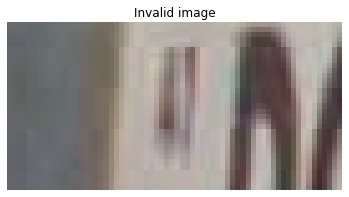

In [4]:
image = train_images[5]
plt.imshow(cv2.imread(os.path.join(train_path, image)))
print(image)
plt.title('Invalid image')
plt.axis('off')
plt.show()

10006.png


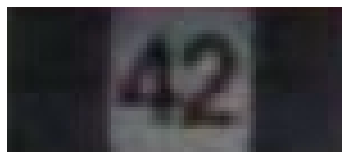

In [5]:
image = train_images[10]
plt.imshow(cv2.imread(os.path.join(train_path, image)))
print(image)
plt.axis('off')
plt.show()

## Testing data

In [4]:
test_path = '../data/test/'
test_images = os.listdir(test_path)

In [6]:
test_w = []
test_h = []
for image_name in tqdm(test_images):
    image = cv2.imread(os.path.join(test_path, image_name))
    test_w.append(image.shape[0])
    test_h.append(image.shape[1])

100%|███████████████████████████████████████████████████████████████████████████| 13068/13068 [01:05<00:00, 201.00it/s]


In [7]:
train_w = np.array(train_w)
train_h = np.array(train_h)
test_w = np.array(test_w)
test_h = np.array(test_h)

print('Number of training images: ', train_w.size)
print('Number of testing images: ', test_w.size)

Number of training images:  33402
Number of testing images:  13068


10029.png


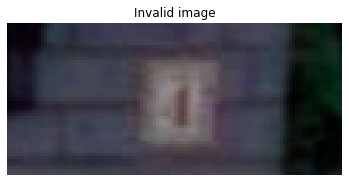

In [9]:
image = test_images[35]
plt.imshow(cv2.imread(os.path.join(test_path, image)))
print(image)
plt.title('Invalid image')
plt.axis('off')
plt.show()

1039.png


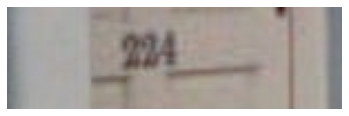

In [10]:
image = test_images[435]
plt.imshow(cv2.imread(os.path.join(test_path, image)))
print(image)
plt.axis('off')
plt.show()

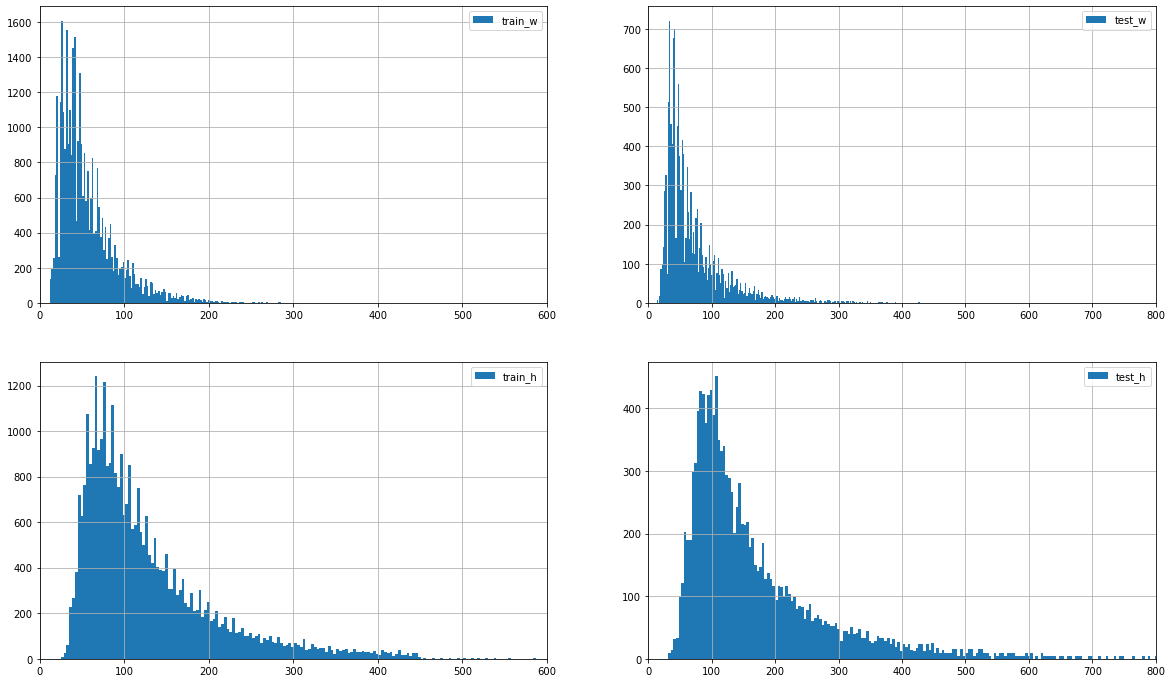

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].hist(train_w, bins=256, label='train_w')
ax[0,1].hist(test_w, bins=256, label='test_w')
ax[1,0].hist(train_h, bins=256, label='train_h')
ax[1,1].hist(test_h, bins=256, label='test_h')

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].legend()
        if j==0:
            ax[i,j].set_xlim([0, 600])
        else:
            ax[i,j].set_xlim([0, 800])

plt.show()

## Width/Height

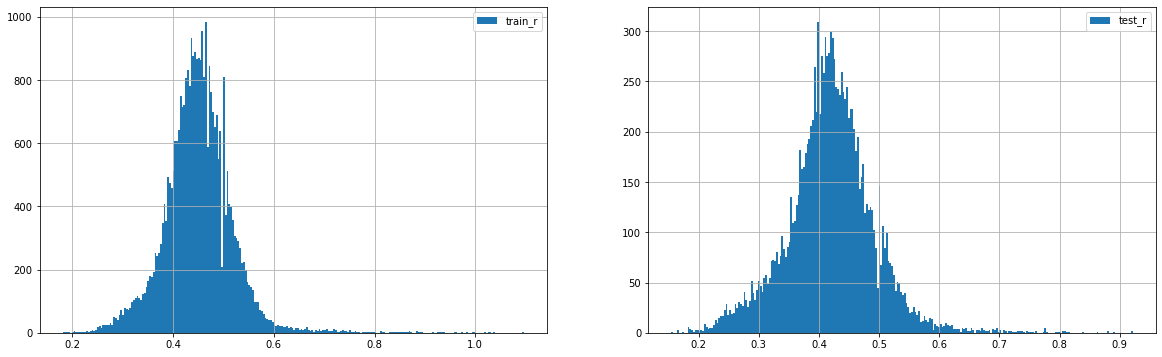

In [12]:
train_r = train_w/train_h
test_r = test_w/test_h

fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].hist(train_r, bins=256, label='train_r')
ax[1].hist(test_r, bins=256, label='test_r')
ax[0].grid(); ax[1].grid()
ax[0].legend(); ax[1].legend()
plt.show()

In [13]:
print('Training data: ')
print('Mean(train_w): ', train_w.mean())
print('Mean(train_h): ', train_h.mean())
print('Mean(train_r): ', train_r.mean())
print('Var(train_w): ', train_w.var())
print('Var(train_h): ', train_h.var())
print('Var(train_r): ', train_r.var())
print('Max(train_w), Min(train_w): ', train_w.max(), train_w.min())
print('Max(train_h), Min(train_h): ', train_h.max(), train_h.min())

print('\nTesting data: ')
print('Mean(test_w): ', test_w.mean())
print('Mean(test_h): ', test_h.mean())
print('Mean(test_r): ', test_r.mean())
print('Var(test_w): ', test_w.var())
print('Var(test_h): ', test_h.var())
print('Var(test_r): ', test_r.var())
print('Max(test_w), Min(test_w): ', test_w.max(), test_w.min())
print('Max(test_h), Min(test_h): ', test_h.max(), test_h.min())

print('\nDifferent: ')
print('Mean(width): ', test_w.mean() - train_w.mean())
print('Mean(height): ', test_h.mean() - train_h.mean())
print('Mean(ratio): ', test_r.mean() - train_r.mean())
print('Var(width): ', test_w.var() - train_w.var())
print('Var(height): ', test_h.var() - train_h.var())
print('Var(ratio): ', test_r.var() - test_h.var())

Training data: 
Mean(train_w):  57.21301119693432
Mean(train_h):  128.28498293515358
Mean(train_r):  0.4499521751120961
Var(train_w):  1308.9312443965575
Var(train_h):  6487.499019443156
Var(train_r):  0.004617182721421662
Max(train_w), Min(train_w):  501 12
Max(train_h), Min(train_h):  876 25

Testing data: 
Mean(test_w):  71.56649831649831
Mean(test_h):  172.58348637894093
Mean(test_r):  0.4194736688576941
Var(test_w):  2782.59773591697
Var(test_h):  15026.286954113908
Var(test_r):  0.005402423205518598
Max(test_w), Min(test_w):  516 13
Max(test_h), Min(test_h):  1083 31

Different: 
Mean(width):  14.353487119563994
Mean(height):  44.298503443787354
Mean(ratio):  -0.030478506254402016
Var(width):  1473.6664915204126
Var(height):  8538.787934670752
Var(ratio):  -15026.281551690703


**Ảnh kích thước lớn nhất trong tập train**

15856.png


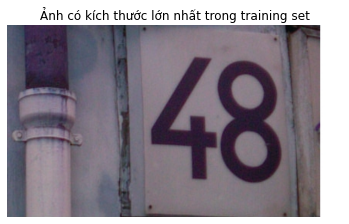

In [14]:
print(train_images[np.argmax(train_w)])
max_w = cv2.imread(os.path.join(train_path, train_images[np.argmax(train_w)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước lớn nhất trong training set')
plt.axis('off')
plt.show()

15.png


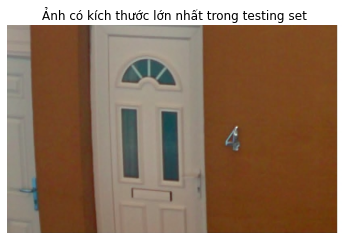

In [15]:
print(test_images[np.argmax(test_w)])
max_w = cv2.imread(os.path.join(test_path, test_images[np.argmax(test_w)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước lớn nhất trong testing set')
plt.axis('off')
plt.show()

12863.png


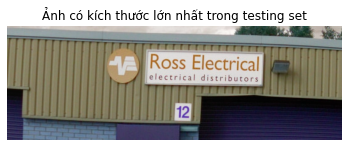

In [16]:
print(test_images[np.argmax(test_h)])
max_w = cv2.imread(os.path.join(test_path, test_images[np.argmax(test_h)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước lớn nhất trong testing set')
plt.axis('off')
plt.show()

10176.png


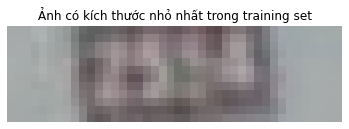

In [17]:
print(train_images[np.argmin(train_w)])
max_w = cv2.imread(os.path.join(train_path, train_images[np.argmin(train_w)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước nhỏ nhất trong training set')
plt.axis('off')
plt.show()

9748.png


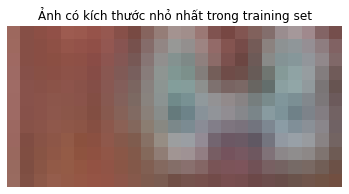

In [18]:
print(train_images[np.argmin(train_h)])
max_w = cv2.imread(os.path.join(train_path, train_images[np.argmin(train_h)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước nhỏ nhất trong training set')
plt.axis('off')
plt.show()

146.png


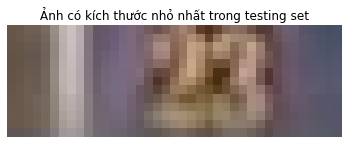

In [19]:
print(test_images[np.argmin(test_w)])
max_w = cv2.imread(os.path.join(test_path, test_images[np.argmin(test_w)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước nhỏ nhất trong testing set')
plt.axis('off')
plt.show()

11258.png


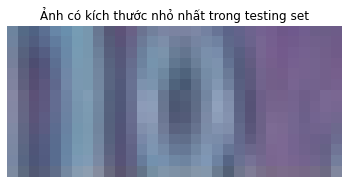

In [20]:
print(test_images[np.argmin(test_h)])
max_w = cv2.imread(os.path.join(test_path, test_images[np.argmin(test_h)]))
plt.imshow(max_w)
plt.title('Ảnh có kích thước nhỏ nhất trong testing set')
plt.axis('off')
plt.show()

### Vẽ boxplot các số trong ảnh

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('./train_label.csv')
df.head()

,name,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9
2,2.png,32,77,29,23,2
3,2.png,32,98,25,26,3
4,3.png,15,17,5,8,2


In [6]:
df.drop(np.where(df.left < 0)[0], inplace=True)
len(df)

73228

1.png
10.png
100.png
1000.png
10000.png
10001.png
10002.png
10003.png
10004.png
10005.png


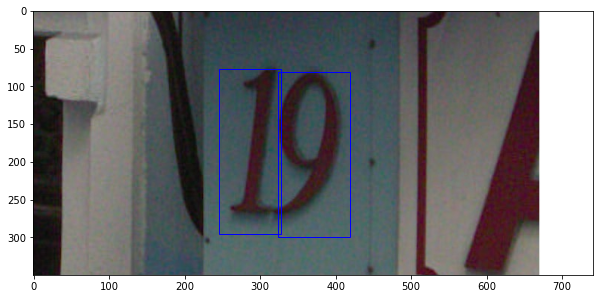

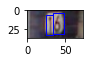

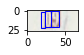

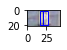

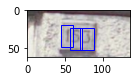

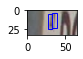

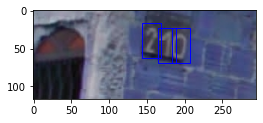

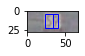

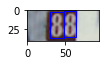

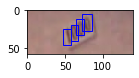

In [10]:
# Hiển thị 10 ảnh đầu tiên
for name in train_images[:10]:
    digits = df[df.name == name]
    print(name)
    im = cv2.imread(os.path.join(train_path, name))
    figsize = im.shape[1]/dpi, im.shape[0]/dpi
    plt.figure(figsize=figsize)
    plt.imshow(im)
    ax = plt.gca()
    for i in range(len(digits)):
        top = digits.top.values[i]
        left = digits.left.values[i]
        width = digits.width.values[i]
        height = digits.height.values[i]
        rect = patches.Rectangle((left, top), width, height, edgecolor='b', facecolor='None')
        ax.add_patch(rect)

### Kiểm tra phân bố kích thước vùng có số trong ảnh

In [7]:
print('Số có chiều cao lớn nhất: ', df.height.max())
print('Số có chiều cao nhỏ nhất: ', df.height.min())
print('Chiều cao trung bình của số: ', df.height.mean())

Số có chiều cao lớn nhất:  403
Số có chiều cao nhỏ nhất:  9
Chiều cao trung bình của số:  33.86131018196213


In [8]:
print('Số có chiều rộng lớn nhất: ', df.width.max())
print('Số có chiều rộng nhỏ nhất: ', df.width.min())
print('Chiều rộng trung bình của số: ', df.width.mean())

Số có chiều rộng lớn nhất:  207
Số có chiều rộng nhỏ nhất:  1
Chiều rộng trung bình của số:  16.650490738086464


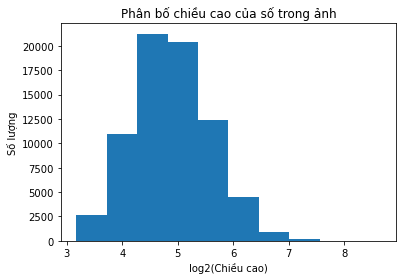

In [11]:
plt.hist(np.log2(df.height))
plt.xlabel('log2(Chiều cao)')
plt.ylabel('Số lượng')
plt.title('Phân bố chiều cao của số trong ảnh')
plt.show()

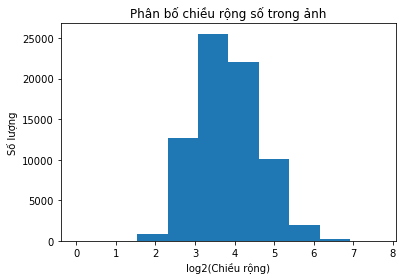

In [12]:
plt.hist(np.log2(df.width))
plt.xlabel('log2(Chiều rộng)')
plt.ylabel('Số lượng')
plt.title('Phân bố chiều rộng số trong ảnh')
plt.show()

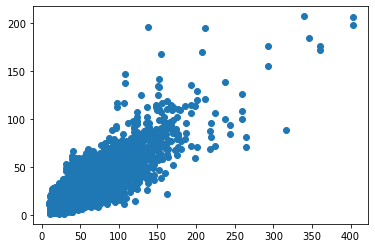

In [9]:
plt.scatter(df.height, df.width)
plt.show()

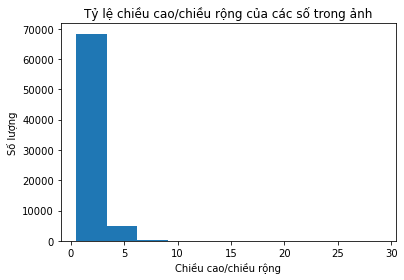

In [13]:
plt.hist(df.height/df.width)
plt.xlabel('Chiều cao/chiều rộng')
plt.ylabel('Số lượng')
plt.title('Tỷ lệ chiều cao/chiều rộng của các số trong ảnh')
plt.show()

In [7]:
import seaborn as sns

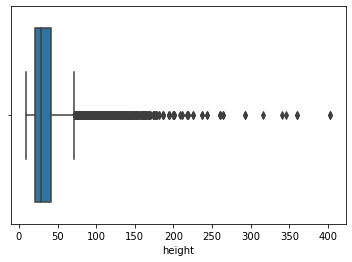

In [9]:
sns.boxplot(df['height'])
plt.show()

In [10]:
np.percentile(df.height, 25)

21.0

In [11]:
np.percentile(df.height, 75)

41.0

In [12]:
np.sum(df.height>41)

18011

### Khảo sát một vài số có chiều cao >= 32, chiều rộng >=16

In [6]:
df1 = df[(df.height >= 32) & (df.width >= 16)]
df1.head()

,name,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9
2,2.png,32,77,29,23,2
3,2.png,32,98,25,26,3
8,5.png,46,52,7,21,3


In [7]:
area = df1.height * df1.width

In [8]:
np.argmin(area)

27

In [10]:
df1.name.values[27]

'34.png'

In [13]:
im = cv2.imread(os.path.join(train_path, '34.png'))
im.shape

(52, 111, 3)

In [14]:
np.argmax(area)

23598

In [15]:
df1.name.values[23598]

'30485.png'

In [18]:
df[df.name == '30485.png']

,name,height,left,top,width,label
66835,30485.png,403,299,1,206,4
66836,30485.png,403,515,21,198,8


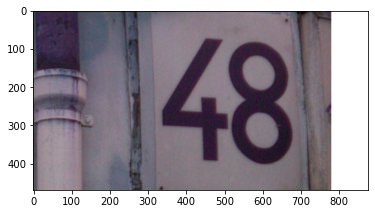

In [21]:
im = cv2.imread(os.path.join(train_path, '30485.png'))
im.shape
plt.imshow(im)
plt.show()

In [19]:
469/16

29.3125

In [20]:
876/16

54.75

In [7]:
print('Số lượng số mà có chiều cao >= 32, chiều rộng >= 16 là: ', len(df1))

Số lượng số mà có chiều cao >= 32, chiều rộng >= 16 là:  25954


In [35]:
area = df1.height * df1.width

In [40]:
index = np.argmin(area)
df1.name.values[index]

'291.png'

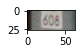

In [39]:
im = cv2.imread(os.path.join(train_path, df1.name.values[index]))
figsize = im.shape[1]/dpi, im.shape[0]/dpi
plt.figure(figsize=figsize)
plt.imshow(im)
plt.show()

In [53]:
index = np.argmax(area)
df1.name.values[index]

'30485.png'

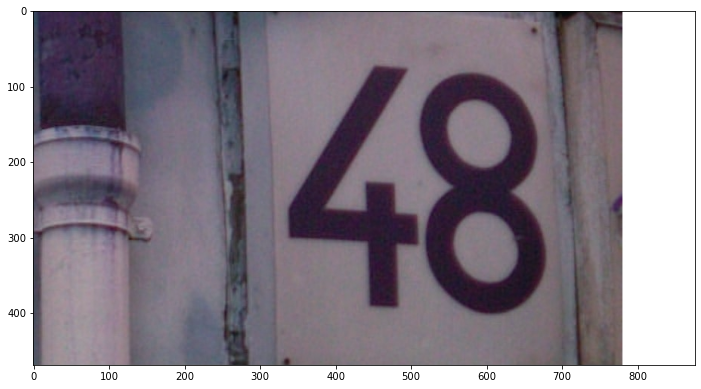

In [54]:
im = cv2.imread(os.path.join(train_path, df1.name.values[index]))
figsize = im.shape[1]/dpi, im.shape[0]/dpi
plt.figure(figsize=figsize)
plt.imshow(im)
plt.show()

### Khảo sát một vài số có chiều cao < 32 hoặc chiều rộng < 16

In [43]:
df2 = df[(df.height < 32) | (df.width < 16)]
df2.head()

,name,height,left,top,width,label
4,3.png,15,17,5,8,2
5,3.png,15,25,5,9,5
6,4.png,34,57,13,15,9
7,4.png,34,72,13,13,3
9,5.png,46,74,10,15,1


In [55]:
index = np.argmax(df2.height)
print(df2.name.values[index])

24153.png


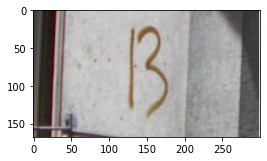

In [56]:
im = cv2.imread(os.path.join(train_path, df2.name.values[index]))
figsize = im.shape[1]/dpi, im.shape[0]/dpi
plt.figure(figsize=figsize)
plt.imshow(im)
plt.show()

In [57]:
index = np.argmax(df2.width)
print(df2.name.values[index])

10663.png


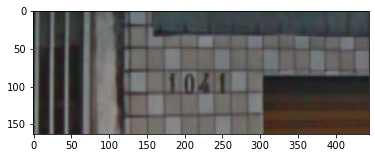

In [58]:
im = cv2.imread(os.path.join(train_path, df2.name.values[index]))
figsize = im.shape[1]/dpi, im.shape[0]/dpi
plt.figure(figsize=figsize)
plt.imshow(im)
plt.show()

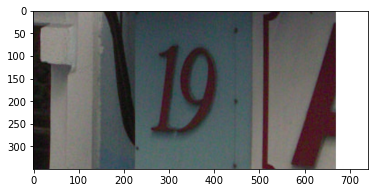

In [16]:
img = cv2.imread(os.path.join(train_path, '1.png'))
plt.imshow(img, cmap='gray')
plt.show()